In [148]:
import numpy as np
import matplotlib.pyplot as plt 
import numpy as np
from numpy.linalg import inv

t0 = 0
x0 = 0
xdot0 = 0
xddot0 = 0
theta0 = 0
thetadot0 = 0
thetaddot0 = 0
tf = 30
n = 10001
m = 15

m1   = 6; #[kg]
m2  = 3; #[kg]
lc  = 0.0983; #[m]
I1   = 0.26; #[m]
g   = 9.81; #[m/s^2]
c = 39;
c_t = 4;
stepamp = 0.5;
k = 40;
theta = 0;
thetadot = 0;
x = 0;
xdot = 0;

In [149]:
dt = (tf - x0) / (n - 1)
t = np.linspace(t0,tf, n)
x = np.zeros ([ n,m ])
xdot = np.zeros ([  n,m ])
xddot = np.zeros ([  n,m  ])
theta = np.zeros ([  n,m  ])
thetadot = np.zeros ([  n,m  ])
thetaddot = np.zeros ([  n,m  ])

f = np.zeros ([  n,m  ])
tf = np.zeros ([  n,m  ])

thetad = np.zeros ([  n,m  ])
xd = np.zeros ([  n,m  ])

e_x = np.zeros ([  n,m  ])
e_t = np.zeros ([  n,m  ])

ei_x = np.zeros ([  n,m  ])
ei_t = np.zeros ([  n,m  ])

ed_x = np.zeros ([  n,m  ])
ed_t = np.zeros ([  n,m  ])

In [150]:
x[0][0] = x0
xdot[0][0] = xdot0
xddot[0][0] = xddot0

theta[0][0] = theta0
thetadot[0][0] = thetadot0
thetaddot[0][0] = thetaddot0

thetad[0][0] = 0
xd[0][0] = 0

In [155]:
q_x = 1
q_t = 1
p_x = 1
p_t = 1
d_x = 1
d_t = 1

In [156]:
for j in range (1 , m):
    x[0][j] = x0
    xdot[0][j] = xdot0
    xddot[0][j] = xddot0

    theta[0][j] = theta0
    thetadot[0][j] = thetadot0
    thetaddot[0][j] = thetaddot0
    
    e_x[0][j] = 0
    e_t[0][j] = 0
    ed_x[0][j] = 0
    ed_t[0][j] = 0    
    ei_x[0][j] = 0
    ei_t[0][j] = 0
        
    for i in range (1 , n) :
        M = [[(m1+m2), (m2*(lc)*np.cos(theta[i-1][j]))],
             [(m2*lc*np.cos(theta[i-1][j])), (m2*(lc**2) + I1)]]
        C = [[c*xdot[i-1][j] + k*x[i-1][j] - (m2*(thetadot[i-1][j]**2)*lc*np.sin(theta[i-1][j]))], [m2*g*lc*np.sin(theta[i-1][j])+ c_t*thetadot[i-1][j]]]

        G = -np.asmatrix(inv(M))*C;
        B = np.asmatrix(inv(M));

        # Desired reference

        if t[i]>0:
            thetad[i][j] = 0.1
            xd[i][j] = 0.1
        if t[i]>8:
            thetad[i][j] = 0.2
            xd[i][j] = 0
        if t[i]>16:
            thetad[i][j] = 0.1
            xd[i][j] = 0.1
        if t[i]>24:
            thetad[i][j] = 0.2
            xd[i][j] = 0
        e_x[i][j] = xd[i][j] - xdot[i][j]
        e_t[i][j] = thetad[i][j] - theta[i][j]

        f[i][j] = q_x*f[i][j-1] + p_x*e_x[i][j-1] + d_x*(e_x[i][j-1] - e_x[i-1][j-1])
        tf[i][j] = q_t*f[i][j-1] + p_t*e_x[i][j-1] + d_t*(e_t[i][j-1] - e_t[i-1][j-1])

        # Open-loop
    #     if t[i]>2 and t[i]<4:
    #         f[i] = 5
    #         tf[i] = 5
    #     else:
    #         f[i] = 0
    #         tf[i] = 0

        U = [[f[i][j]],
             [tf[i][j]]]
        twodot = G + B*U
        xddot[i][j] = twodot[0]
        thetaddot[i][j] = twodot[1]


        xdot[i][j] = xdot[i-1][j] +  (dt * xddot[i][j])
        x[i][j] =  x[i-1][j] + (dt * (xdot[i][j]))

        thetadot[i][j] = thetadot[i-1][j] +  (dt * thetaddot[i][j])
        theta[i][j] =  theta[i-1][j] + (dt * (thetadot[i][j]))



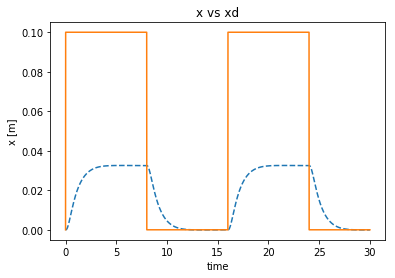

In [157]:
plt.plot(t,  x[:,14],'--')
# plt.plot(t,  f,'--')
plt.plot(t,  xd[:,14])
plt.xlabel('time')
plt.ylabel('x [m]')
plt.title('x vs xd')
plt.show ()

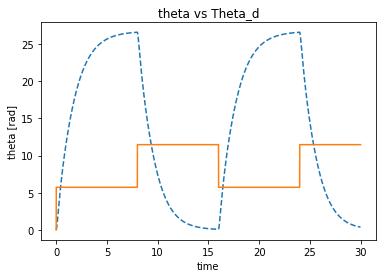

In [158]:
plt.plot(t,  theta[:,14]*57.2958,'--')
plt.plot(t,  thetad[:,14]*57.2958)
plt.xlabel('time')
plt.ylabel('theta [rad]')
plt.title('theta vs Theta_d')
plt.show ()